In [179]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

In [180]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [181]:
train_data.shape

(891, 12)

In [182]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [183]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [184]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [185]:
train_data.Sex=train_data.Sex.replace(['male','female'],[0,1])
test_data.Sex=test_data.Sex.replace(['male','female'],[0,1])

In [186]:
train_data.Age=train_data.Age.replace(np.nan,np.mean(train_data.Age))
test_data.Age=test_data.Age.replace(np.nan,np.mean(test_data.Age))

In [187]:
train_data.Embarked=train_data.Embarked.ffill()

In [188]:
train_data.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [189]:
test_data.Embarked.unique()

array(['Q', 'S', 'C'], dtype=object)

In [190]:
train_data.Embarked=train_data.Embarked.replace(['S','C','Q'],[1,2,3]).astype('int')
test_data.Embarked=test_data.Embarked.replace(['S','C','Q'],[1,2,3]).astype('int')

In [191]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

<AxesSubplot:>

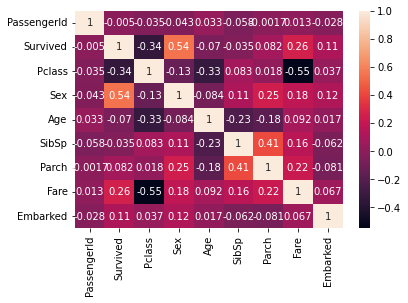

In [192]:
sns.heatmap(train_data.corr(),annot=True)

In [193]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1


In [194]:
x_train=train_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y_train=train_data.Survived

In [208]:
from sklearn.ensemble import RandomForestClassifier

In [209]:
Model=RandomForestClassifier()

In [210]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    int32  
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [211]:
Model.fit(x_train,y_train)

RandomForestClassifier()

In [212]:
Model.score(x_train,y_train)

0.9820426487093153

In [213]:
x_test=test_data[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

In [214]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    int32  
dtypes: float64(2), int32(1), int64(4)
memory usage: 21.4 KB


In [215]:
x_test.Fare=x_test.Fare.replace(np.nan,np.mean(x_test.Fare))

c:\Users\DELL\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [216]:
x_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [217]:
y_predict=Model.predict(x_test)

In [218]:
result=pd.DataFrame({
'Survived':y_predict})
result.index=test_data.PassengerId
result

,Survived
PassengerId,
892,0
893,0
894,0
895,1
896,1
...,...
1305,0
1306,1
1307,0


In [219]:
result.to_csv('gender_submission.csv')

In [220]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')